In [4]:
############################################################################
# reads canvas/pixel files of individual frames
# if the frame contains a particle (other than the hot pixels), the entire frame is saved
# a cutout around the particle is also saved
# also saves the list of frames that are saved to a txt document
############################################################################

import numpy as np
from PIL import Image 
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

directory = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Raw Data\\6000 frames up 2\\"
# loops over all files in directory
for i in range(6000):
    if i < 10:
        file_name = "Frame-000" + str(i)
    elif i > 9 and i < 100:
        file_name = "Frame-00" + str(i)
    elif i > 99 and i < 1000:
        file_name = "Frame-0" + str(i)
    elif i > 999:
        file_name = "Frame-" + str(i)
    file = open(directory + file_name + ".txt")
    
    # read in data
    data = pd.read_table(file, header=None, delimiter=' ', nrows=256) 
    data = data.iloc[:, :]
    rows, cols = data.shape
    na = np.array(data)
    # remove hot pixels
    na[112][231] -= 0.5
    na[139][224] -= 0.5
    total = np.sum(na)
    
    ## make an image of the canvas
    plt.figure(figsize=(3.4, 3.4), dpi=100) # dimensions give a 256x256 pixel image
    plt.axis('off')
    plt.imshow(na>0, origin="lower",cmap="gray")
    # saves image if there is a particle i.e. sum of pixels values > 0
    if total > 0:
        # save image
        plt.savefig("C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2\\" 
                    + file_name + ".jpg",dpi=100, bbox_inches='tight',pad_inches = 0)
        # save image as a grayscale image as as opposed to an rgb image (which is what the previous step does)
        Image.open("C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2\\" 
                    + file_name + ".jpg").convert("L").save("C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2\\" 
                    + file_name + ".jpg")
        # saves frame name to txt file
        txt_file = open("C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2\\File Names.txt", "a")
        txt_file.write(file_name + "\n")
        txt_file.close()
        
        # read in image data
        directory1 = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2\\"
        img = plt.imread(directory1 + file_name + ".jpg")
        
        # checks that there is a particle i.e. sum of pixels values > 0
        total1 = 0
        for i in range(256):
            for j in range(256):
                total1 += img[i][j]
        # if a pixel has a non-zero value, append the x and y coordinate to separate arrays
        if total1 > 0:
            x_arr, y_arr = [], []
            for i in range(256):
                for j in range(256):
                    if img[i][j] != 0:
                        x_arr.append(j)
                        y_arr.append(i)
            # get the min and max x and y values to find the limits of the non-zero pixels within the canvas
            x_min, x_max = min(x_arr), max(x_arr)
            y_min, y_max = min(y_arr), max(y_arr)

            # create range in which the particle (and all non-zero particles) lie
            x_range, y_range = (x_max - x_min) + 1, (y_max - y_min) + 1
            #print(x_min, x_max, y_min, y_max, x_range, y_range)

            # recreate image in only the range provided by the particle and non-zero pixels instead of the whole canvas
            rows, cols = (x_range, y_range)
            pix_arr = [[0]*rows]*cols

            pix_arr = np.array(pix_arr)
            
            # get infromation from the whole canvas and add the pixel values to a new array
            for x in range(x_range):
                for y in range(y_range):
                    x_val = x_min + x # the positions of the particle will likwly have some offset (i.e. wont start at 0,0) so the code has to go though the old positions with the offset but start at 0,0 when adding the code to a new array
                    y_val = y_min + y
                    pix_arr[y][x] = img[y_val][x_val]

            # plot and save the image
            plt.figure(figsize=(3.4, 3.4), dpi=100)
            plt.axis('off')
            plt.imshow(pix_arr,cmap="cividis")

            plt.savefig("C:\\Users\\Butter\\Desktop\\Machine Learning\\Sorted Data\\6000 frames up 2 - small blue\\" 
                                + file_name + ".jpg",dpi=100, bbox_inches='tight',pad_inches = 0)
            plt.close()
    plt.close()

x min = 240
x max = 255
y min = 152
y max = 167
x range = 16
y range = 16
[[  0  14   0   0  15   0   0   6   4   0  11   0   8   0  11   0]
 [  7   0   6   0   0  34   0   0   0   0   9   9   0   8   0   7]
 [  0  19   0   6   3   0   6 101  98  95   7   0   0   0   9   0]
 [  0   3   9   0  10   0  85 246 235 246  97   0  13   0  15   0]
 [  3   7   0   6   0  87 255 255 255 255 238  94   2  11   0   8]
 [ 16   0  16   0   0 249 255 255 255 242 255 235   0   4   0   3]
 [  0   4   0   0  16 255 240 255 252 255 239 255   0   0  13   0]
 [  0   0   4   0   5 249 255 252 245 255 253 239   9   3   0   2]
 [  0  16   0   0   5 172 171 255 245 255 249 166   5  15   0  13]
 [  3   0   0  29   0   7  18 169 188 174 179  24   0   0  12   0]
 [  4   2   1   0   0   0   0   7   0   0  20   0   2   2   1   0]
 [  0   8   2   0  12   4   1   0   2  10   0  17   2  17   0  11]
 [  0   5   0   9   4   0   1  13   0   7   3   0   0   8   1  13]
 [  0  11   0   0   0  14   8   0   4   7   6   1   9  

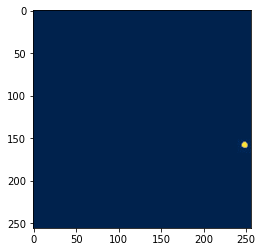

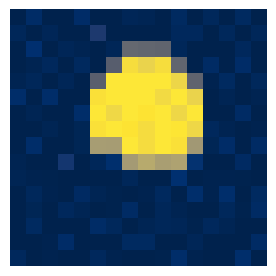

In [7]:
# testing

directory = "C:\\Users\\Butter\\Desktop\\Machine Learning\\Alpha and electron classification\\Data\\Training\\0-Alpha\\"
file_name = "0_9.jpg"

img = plt.imread(directory + file_name)
plt.imshow(img,cmap="cividis")

x_arr, y_arr = [], []
for i in range(256):
    for j in range(256):
        if img[i][j] != 0:
            x_arr.append(j)
            y_arr.append(i)

x_min, x_max = min(x_arr), max(x_arr)
y_min, y_max = min(y_arr), max(y_arr)

x_range, y_range = (x_max - x_min) + 1, (y_max - y_min) + 1
print("x min =", x_min)
print("x max =", x_max)
print("y min =", y_min)
print("y max =", y_max)
print("x range =", x_range)
print("y range =", y_range)

rows, cols = (x_range, y_range)
pix_arr = [[0]*rows]*cols

pix_arr = np.array(pix_arr)

for x in range(x_range):
    for y in range(y_range):
        x_val = x_min + x
        y_val = y_min + y
        #print(y_val, x_val, img[y_val][x_val])
        pix_arr[y][x] = img[y_val][x_val]
        
print(pix_arr)

plt.figure(figsize=(3.4, 3.4), dpi=100)
plt.axis('off')
plt.imshow(pix_arr,cmap="cividis")